In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt
from scipy.stats import chi2

%matplotlib inline


In [2]:
# 観測データを取得
df = pd.read_csv("road.csv", index_col=0)   # インデックス列は除いて読み込む

# Numpyのarray型へ変換
X = df.drop("drivers", axis=1)
X = X.values
X

array([[9.6800e+02, 6.4000e+01, 6.6000e+01, 6.2000e+01, 1.1900e+02],
       [4.3000e+01, 4.0000e-01, 5.9000e+00, 3.0000e+01, 6.2000e+00],
       [5.8800e+02, 1.2000e+01, 3.3000e+01, 6.4000e+01, 6.5000e+01],
       [6.4000e+02, 3.4000e+01, 7.3000e+01, 5.1000e+01, 7.4000e+01],
       [4.7430e+03, 1.0000e+02, 1.1800e+02, 6.5000e+01, 1.0500e+02],
       [5.6600e+02, 1.7000e+01, 7.3000e+01, 4.2000e+01, 7.8000e+01],
       [3.2500e+02, 5.1800e+02, 5.1000e+00, 3.7000e+01, 9.5000e+01],
       [1.1800e+02, 2.2600e+02, 3.4000e+00, 4.1000e+01, 2.0000e+01],
       [1.1500e+02, 1.2524e+04, 0.0000e+00, 4.4000e+01, 2.3000e+01],
       [1.5450e+03, 9.1000e+01, 5.7000e+01, 6.7000e+01, 2.1600e+02],
       [1.3020e+03, 6.8000e+01, 8.3000e+01, 5.4000e+01, 1.6200e+02],
       [2.6200e+02, 8.1000e+00, 4.0000e+01, 3.6000e+01, 2.9000e+01],
       [2.2070e+03, 1.8000e+02, 1.0200e+02, 3.3000e+01, 3.5000e+02],
       [1.4100e+03, 1.2900e+02, 8.9000e+01, 3.7000e+01, 1.9600e+02],
       [8.3300e+02, 4.9000e+01, 1.

In [3]:
drivers = pd.DataFrame(df["drivers"])
drivers = drivers.values
drivers

array([[158],
       [ 11],
       [ 91],
       [ 92],
       [952],
       [109],
       [167],
       [ 30],
       [ 35],
       [298],
       [203],
       [ 41],
       [544],
       [254],
       [150],
       [136],
       [147],
       [146],
       [ 46],
       [157],
       [255],
       [403],
       [189],
       [ 85],
       [234],
       [ 38]], dtype=int64)

In [9]:
# マハラノビス=タグチ法
X = X / drivers     # 1ドライバー当たりの数値に変換
X = np.log(X + 1)   # 対数変換（ボックス=コックス変換）

mx = X.mean(axis=0) # 標本平均
Xc = X - mx         # 中心化したデータ行列

# Sx = (1.0 / len(X)) * Xc.T.dot(Xc) # 標本共分散行列

Sx = np.cov(X, rowvar=0, bias=1) # 標本共分散行列

a = (Xc.dot(np.linalg.pinv(Sx)) * Xc).sum(axis=1) / X.shape[1]  # 1変数当たりの異常度

# 閾値を決定
# （標本が正常範囲に入るように1変数当たりのマハラノビス距離の閾値を決める）
th = 1.0

state_label = df.index[a>th]    # 閾値を超えた州の名前リスト
state_a = a[a>th]               # 閾値を超えた州の異常度リスト
print(state_label)
print(state_a)


Index(['Alaska', 'Dela', 'DC', 'Idaho', 'Maine', 'Mont'], dtype='object')
[4.89256838 1.06746666 4.29601326 2.90424221 4.48389158 4.76026157]


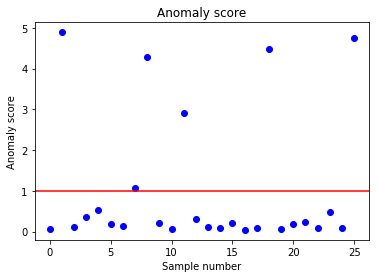

In [10]:
# プロット
plt.plot(range(len(a)), a, "bo")
plt.axhline(y=th,color='red')
plt.title("Anomaly score")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.show()

In [6]:
# SN比解析
xc_prime = Xc[4,:]  # 中心化行列からCalifのデータ行を取得
SN1 = 10 * np.log10(xc_prime**2 / np.diag(Sx))
SEN = 10 * np.log10(xc_prime**2)

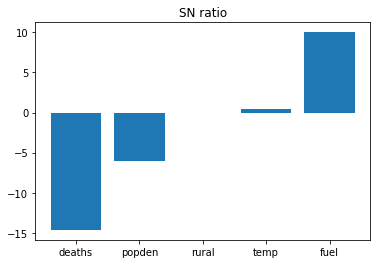

In [11]:
plt.bar(range(len(SN1)), SN1, tick_label=["deaths","popden","rural","temp","fuel"], align="center")
plt.title("SN ratio")
plt.show()

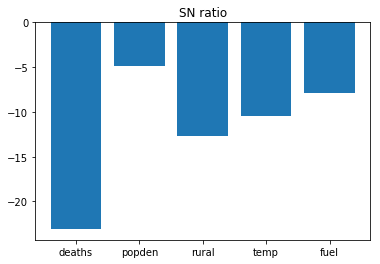

In [12]:
plt.bar(range(len(SEN)), SEN, tick_label=["deaths","popden","rural","temp","fuel"], align="center")
plt.title("SN ratio")
plt.show()